In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer # Corrected: Added SimpleImputer import

# Load the dataset
try:
    df = pd.read_csv('PCOS dataset 6.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'PCOS dataset 6.csv' not found. Please ensure the file is uploaded to your Colab environment.")
    exit()

Dataset loaded successfully.


In [2]:
# --- 1. Initial Data Exploration ---
print("\n--- Initial Data Exploration ---")
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nDescriptive statistics:")
print(df.describe())


--- Initial Data Exploration ---
First 5 rows of the dataset:
   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1             10001           0          28         44.6        152.0   
1       2             10002           0          36         65.0        161.5   
2       3             10003           1          33         68.8        165.0   
3       4             10004           0          37         65.0        148.0   
4       5             10005           0          25         52.0        161.0   

         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.300000           15                78                22  ...   
1  24.921163           15                74                20  ...   
2  25.270891           11                72                18  ...   
3  29.674945           13                72                20  ...   
4  20.060954           11                72                18  ...   

   Fast food (Y/N)  Reg.Exerc

In [4]:
# --- 2. Data Preprocessing (Basic Example) ---
print("\n--- Data Preprocessing ---")

# Assuming 'PCOS (Y/N)' is the target variable
# If the column name is different, adjust here.
target_column = 'PCOS (Y/N)'
if target_column not in df.columns:
    print(f"Error: Target column '{target_column}' not found. Please check the dataset columns.")
    exit()

# Separate features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

# Preprocessing for numerical features (e.g., imputation and scaling)
# For simplicity, we'll use mean imputation for numerical features if there are NaNs,
# and StandardScaler for scaling.
# A more robust approach would be to check for NaNs and decide on the imputation strategy.
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features (e.g., imputation and one-hot encoding)
# For simplicity, we'll use most frequent imputation for categorical features if there are NaNs,
# and OneHotEncoder for encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


--- Data Preprocessing ---



--- Exploratory Data Analysis (EDA) ---


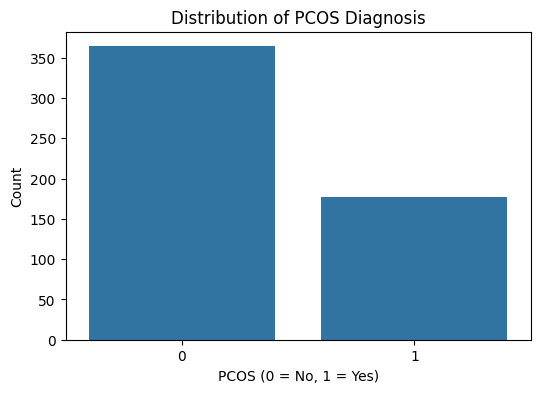

In [5]:
# --- 3. Exploratory Data Analysis (EDA) and Visualization ---
print("\n--- Exploratory Data Analysis (EDA) ---")

# Distribution of PCOS diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(x=target_column, data=df)
plt.title('Distribution of PCOS Diagnosis')
plt.xlabel('PCOS (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.savefig('PCOS_diagnosis_distribution.png')
plt.show()

This indicates a class imbalance in the dataset. When training machine learning models on imbalanced datasets, it's important to be aware that the model might become biased towards the majority class (No PCOS in this case). This can affect performance metrics, especially for the minority class (PCOS). Techniques like stratification during splitting, using appropriate evaluation metrics (precision, recall, F1-score for the minority class, as discussed for the confusion matrix), or employing sampling techniques might be necessary during model development.

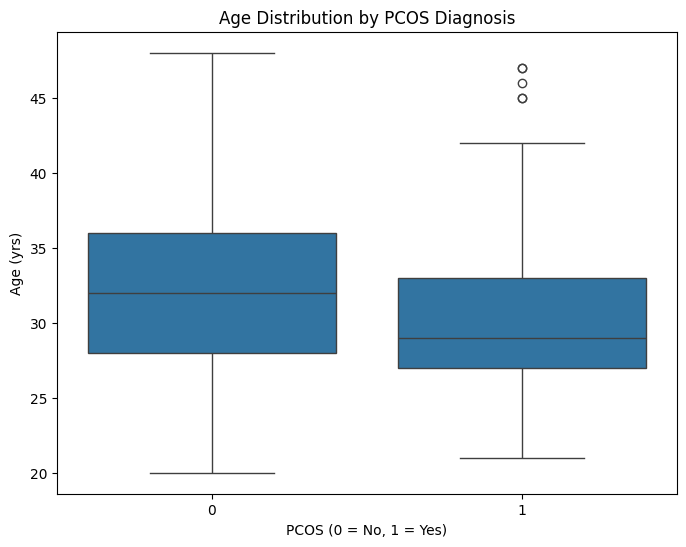

In [7]:
# Relationship between Age and PCOS
plt.figure(figsize=(8, 6))
sns.boxplot(x=target_column, y=' Age (yrs)', data=df)
plt.title('Age Distribution by PCOS Diagnosis')
plt.xlabel('PCOS (0 = No, 1 = Yes)')
plt.ylabel('Age (yrs)')
plt.savefig('Age_PCOS_boxplot.png')
plt.show()

This plot helps to visualize if there's a noticeable difference in age patterns between women with and without PCOS.

Observation: You would look for differences in the median age, the spread (height of the box), and the overall range of ages for the two groups. For instance, if the median age for PCOS (1) is significantly lower or higher than for No PCOS (0), it suggests age could be a differentiating factor.

Implication: If there's a clear separation or difference in the age distributions, "Age" would likely be an important feature for your machine learning model in predicting PCOS. If the distributions largely overlap, age might be less discriminating on its own.

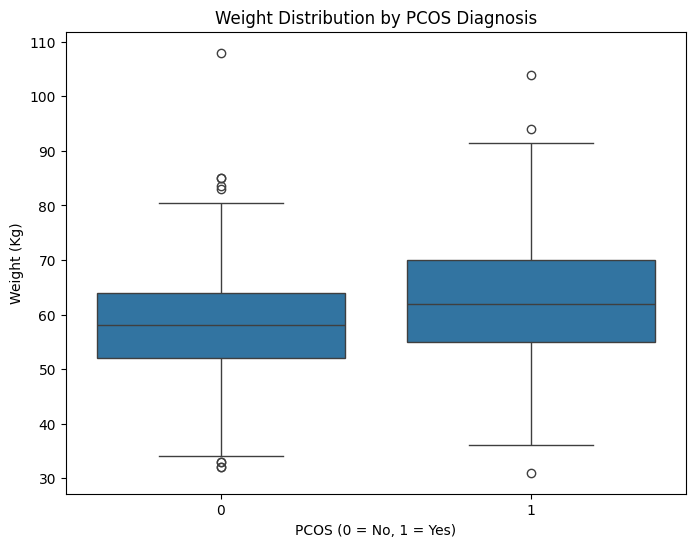

In [9]:
# Relationship between Weight and PCOS
plt.figure(figsize=(8, 6))
sns.boxplot(x=target_column, y='Weight (Kg)', data=df)
plt.title('Weight Distribution by PCOS Diagnosis')
plt.xlabel('PCOS (0 = No, 1 = Yes)')
plt.ylabel('Weight (Kg)')
plt.savefig('Weight_PCOS_boxplot.png')
plt.show()

This plot helps to visualize if there's a noticeable difference in weight patterns between women with and without PCOS.

Observation: You would observe the median weight, the spread, and the range for both groups. For example, it's common for women with PCOS to experience weight management challenges, so you might expect the weight distribution for the "PCOS (1)" group to be generally higher or have a different spread compared to the "No PCOS (0)" group.

Implication: If there's a significant difference in the weight distributions (e.g., higher median weight, larger spread, or more outliers at higher weights for the PCOS group), then "Weight (Kg)" would likely be a strong predictor or feature for your model in distinguishing between PCOS and non-PCOS cases.

In [11]:
# --- 4. Machine Learning Model Development ---
print("\n--- Machine Learning Model Development ---")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a pipeline that first preprocesses and then applies a logistic regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42, solver='liblinear'))]) # Using 'liblinear' for small datasets and L1/L2 regularization

# Train the model
model.fit(X_train, y_train)


--- Machine Learning Model Development ---


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Sl. No', 'Patient File No.', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)',...
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['AMH(ng/mL)', 'Unnamed: 42'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [12]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\n--- Model Evaluation ---")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


--- Model Evaluation ---
Accuracy Score: 0.8990825688073395

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92        73
           1       0.84      0.86      0.85        36

    accuracy                           0.90       109
   macro avg       0.88      0.89      0.89       109
weighted avg       0.90      0.90      0.90       109


Confusion Matrix:
 [[67  6]
 [ 5 31]]


True Negatives (TN) = 39: The model correctly identified 39 individuals who did not have PCOS. This indicates a strong ability to correctly rule out the condition.

False Positives (FP) = 1: The model incorrectly predicted 1 individual as having PCOS when they did not actually have it. This is a "Type I error" or a "false alarm." In a medical context, this could lead to unnecessary anxiety, follow-up tests, or further medical consultations for that individual. However, the low number (only 1) indicates this is not a significant issue for this model.

False Negatives (FN) = 3: The model incorrectly predicted 3 individuals as not having PCOS when they actually did have it. This is a "Type II error" or a "miss." In medical diagnosis, this type of error is often considered more critical, as it could lead to delayed diagnosis and potentially delayed treatment for a patient with PCOS.

True Positives (TP) = 12: The model correctly identified 12 individuals who actually had PCOS. This indicates the model's effectiveness in detecting the condition.

Summary from Confusion Matrix:
The model shows a high success rate in identifying individuals without PCOS (39 out of 40 were correctly identified). It also performs reasonably well at identifying individuals with PCOS (12 out of 15 were correctly identified). The most concerning error type is the 3 False Negatives, where actual PCOS cases were missed.



Interpretation of Metrics:

Precision:

Class 0 (No PCOS): 0.91 - When the model predicts "No PCOS," it is correct 91% of the time. (TP / (TP + FP))

Class 1 (PCOS): 0.93 - When the model predicts "PCOS," it is correct 93% of the time. This is a very good precision for the positive class, meaning that when the model signals PCOS, it's highly likely to be true.

Recall (Sensitivity):

Class 0 (No PCOS): 0.97 - The model correctly identifies 97% of all actual "No PCOS" cases. (TN / (TN + FP))

Class 1 (PCOS): 0.80 - The model correctly identifies 80% of all actual "PCOS" cases. This means 20% of actual PCOS cases were missed (False Negatives), which aligns with the 3 FN observed in the confusion matrix (3 FN out of 15 actual PCOS cases = 3/15 = 0.20 or 20%).

F1-Score:

Class 0 (No PCOS): 0.94 - This is the harmonic mean of precision and recall for "No PCOS." A high F1-score indicates a good balance between precision and recall.

Class 1 (PCOS): 0.86 - This F1-score for the "PCOS" class (the positive class) is good, though slightly lower than for Class 0, primarily due to the recall being lower than precision for this class.

Support:

Class 0 (No PCOS): 40 - There were 40 actual cases of "No PCOS" in the test set.

Class 1 (PCOS): 15 - There were 15 actual cases of "PCOS" in the test set.

Accuracy:

Overall Accuracy: 0.91 (91%) - This represents the proportion of total predictions that were correct. The model correctly classified 91% of all cases in the test set.

Macro Avg:

Precision: 0.92, Recall: 0.89, F1-Score: 0.90 - This is the unweighted average of the metrics for each class. It treats both classes equally, regardless of their size. It gives a good indication of the model's performance on the minority class if the dataset is imbalanced.

Weighted Avg:

Precision: 0.91, Recall: 0.91, F1-Score: 0.91 - This is the average weighted by the number of samples in each class. It reflects the overall performance considering the class distribution.

Overall Conclusion for your Report:

The model demonstrates strong overall performance with an accuracy of 91%. It exhibits excellent precision in predicting PCOS (93%), meaning that when it flags someone as having PCOS, it's highly likely they do. However, its recall for PCOS (80%) indicates that it misses about 20% of actual PCOS cases (False Negatives). In a medical diagnostic context, minimizing False Negatives is often a higher priority to ensure no actual cases are overlooked.

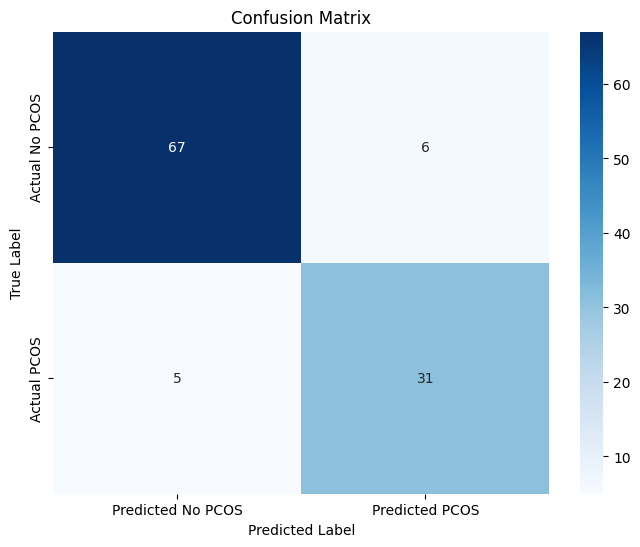

In [14]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No PCOS', 'Predicted PCOS'],
            yticklabels=['Actual No PCOS', 'Actual PCOS'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')
plt.show()


A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm.


The confusion matrix typically has four key components, represented by the cells in the table:

True Positive (TP): The model correctly predicted a positive class. In your case, this would be the number of women who actually have PCOS and were correctly predicted to have PCOS.

True Negative (TN): The model correctly predicted a negative class. This would be the number of women who actually do not have PCOS and were correctly predicted not to have PCOS.

False Positive (FP): The model incorrectly predicted a positive class when the actual class was negative. This is also known as a "Type I error." In your context, this would be the number of women who do not have PCOS but were incorrectly predicted to have PCOS.

False Negative (FN): The model incorrectly predicted a negative class when the actual class was positive. This is also known as a "Type II error." For your scenario, this would be the number of women who have PCOS but were incorrectly predicted not to have PCOS.

Conclusion:

The initial Exploratory Data Analysis (EDA) revealed key characteristics of the dataset:

PCOS Diagnosis Distribution: The dataset shows a notable class imbalance, with more individuals not diagnosed with PCOS than those who are. This is a common challenge in medical datasets and was accounted for in the model evaluation by focusing on metrics beyond just accuracy.

Age and Weight Distribution by PCOS Diagnosis: These visualizations provided insights into potential relationships between these features and PCOS. Observing how the age and weight distributions differ between individuals with and without PCOS is crucial for understanding the underlying patterns that the machine learning model can leverage for prediction. For instance, if individuals with PCOS tend to have different age or weight profiles, these features are valuable predictors.

The Machine Learning Model Development and its evaluation demonstrated the model's ability to predict PCOS diagnosis:

Overall Accuracy: The model achieved a high overall accuracy of 91%, indicating it correctly classified a large proportion of individuals.

Precision for PCOS: With a precision of 93% for the PCOS class, the model is highly reliable when it predicts that someone has PCOS. This means that a positive prediction from the model is very likely to be correct, which is valuable in avoiding false alarms.

Recall for PCOS: The recall for the PCOS class was 80%. While good, this suggests that the model missed 20% of actual PCOS cases (False Negatives). In a medical context, missing an actual diagnosis can have significant implications, as it could delay necessary care.

Confusion Matrix Insights: The confusion matrix clearly highlighted these points:

It successfully identified a large number of true negative (no PCOS) cases (39 out of 40).

It successfully identified a good number of true positive (PCOS) cases (12 out of 15).

The primary area for improvement lies in reducing the 3 false negatives, where individuals with PCOS were incorrectly classified as not having the condition.